In [337]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt     
from matplotlib.gridspec import GridSpec

from scipy.stats import norm
from scipy.integrate import quad


In [338]:
df = pd.read_csv('Price_MGP.csv')
df = df[[ "date", "Day", "month", "year", "Hour","CNOR", "CSUD", "NORD", "SARD", "SICI", "SUD"]]
df["date"]=df["date"].astype("datetime64[ns]")
df_sorted_hour = df[df["Hour"] == 11]
df_sorted_hour = df_sorted_hour.sort_values("date")
df_sorted_hour.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
date,3287,2015-06-30 22:09:09.802251264,2011-01-01 00:00:00,2013-04-01 12:00:00,2015-07-02 00:00:00,2017-09-30 12:00:00,2019-12-31 00:00:00,NaN
Day,3287.0,15.728628,1.0,8.0,16.0,23.0,31.0,8.801004
month,3287.0,6.523274,1.0,4.0,7.0,10.0,12.0,3.449133
year,3287.0,2014.999392,2011.0,2013.0,2015.0,2017.0,2019.0,2.582185
Hour,3287.0,11.0,11.0,11.0,11.0,11.0,11.0,0.0
CNOR,3287.0,60.93888,0.0,47.82,59.89,72.33,217.0,19.558867
CSUD,3287.0,58.930821,0.0,46.16,57.43,70.0,217.0,19.099502
NORD,3287.0,62.593696,2.248008,49.725,61.26,73.965,217.0,19.049166
SARD,3287.0,60.507286,0.0,46.025,57.33552,70.355,300.0,24.769971
SICI,3287.0,75.448709,0.0,51.83,64.93,98.155,190.0,33.249806


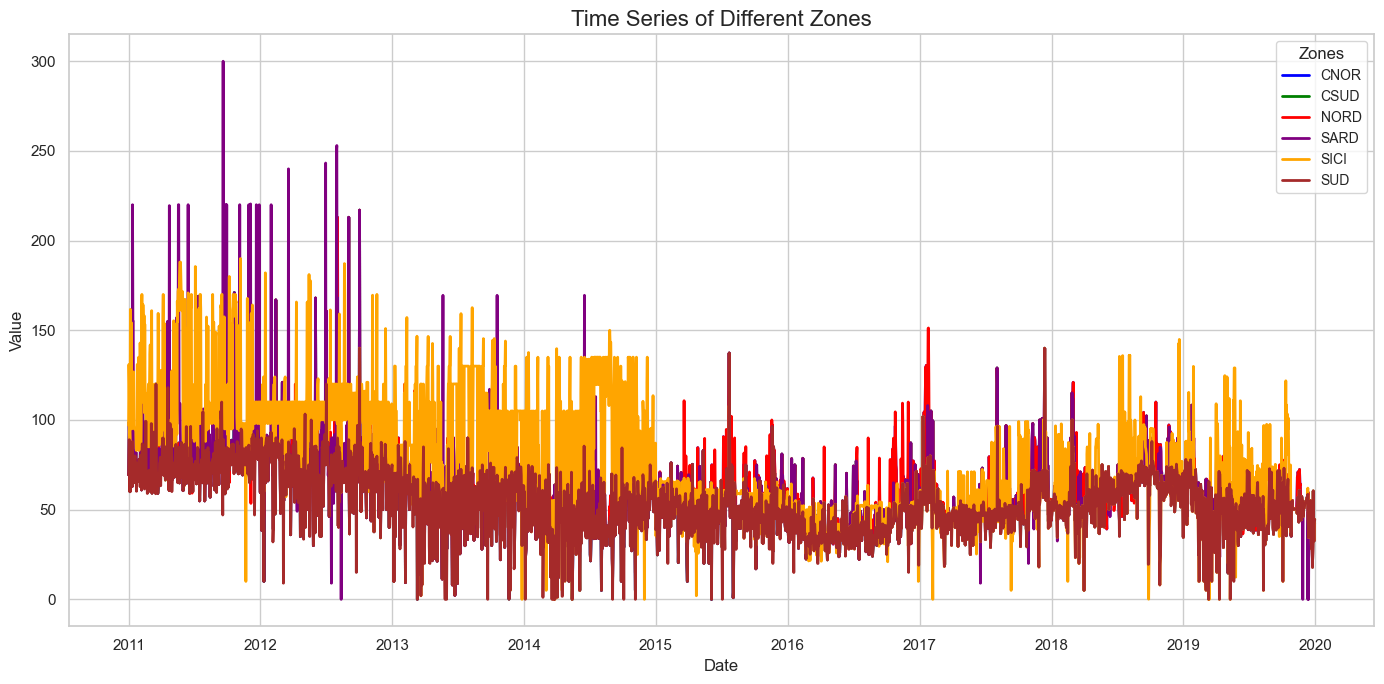

In [339]:

# Plot the time series
plt.figure(figsize=(14, 7))

plt.plot(df_sorted_hour["date"], df_sorted_hour["CNOR"], color='blue', linewidth=2, label='CNOR')
plt.plot(df_sorted_hour["date"], df_sorted_hour["CSUD"], color='green', linewidth=2, label='CSUD')
plt.plot(df_sorted_hour["date"], df_sorted_hour["NORD"], color='red', linewidth=2, label='NORD')
plt.plot(df_sorted_hour["date"], df_sorted_hour["SARD"], color='purple', linewidth=2, label='SARD')
plt.plot(df_sorted_hour["date"], df_sorted_hour["SICI"], color='orange', linewidth=2, label='SICI')
plt.plot(df_sorted_hour["date"], df_sorted_hour["SUD"],  color='brown', linewidth=2, label='SUD')

# Format x-axis to show only years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add titles and labels
plt.title("Time Series of Different Zones", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)

plt.legend(title="Zones", fontsize=10)
plt.tight_layout()


In [340]:
#genereate log yelds
def log_yield(df, col):
    #if np.log(df[col]) =0 then np.log(df[col]) =1
    df[col] = df[col].replace(0, 1)
    return (np.log(df[col]) - np.log(df[col].shift(1)))*100

In [341]:
R_CNOR = log_yield(df_sorted_hour, "CNOR")
R_CSUD = log_yield(df_sorted_hour, "CSUD")
R_NORD = log_yield(df_sorted_hour, "NORD")      
R_SARD = log_yield(df_sorted_hour, "SARD")
R_SICI = log_yield(df_sorted_hour, "SICI")
R_SUD = log_yield(df_sorted_hour, "SUD")
df_sorted_hour["R_CNOR"] = R_CNOR   
df_sorted_hour["R_CSUD"] = R_CSUD
df_sorted_hour["R_NORD"] = R_NORD
df_sorted_hour["R_SARD"] = R_SARD
df_sorted_hour["R_SICI"] = R_SICI
df_sorted_hour["R_SUD"] = R_SUD
df_sorted_hour.dropna(inplace=True)
df_sorted_hour.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
date,3286,2015-07-01 10:08:41.485088256,2011-01-02 00:00:00,2013-04-02 06:00:00,2015-07-02 12:00:00,2017-09-30 18:00:00,2019-12-31 00:00:00,NaN
Day,3286.0,15.73311,1.0,8.0,16.0,23.0,31.0,8.798591
month,3286.0,6.524954,1.0,4.0,7.0,10.0,12.0,3.448312
year,3286.0,2015.000609,2011.0,2013.0,2015.0,2017.0,2019.0,2.581635
Hour,3286.0,11.0,11.0,11.0,11.0,11.0,11.0,0.0
CNOR,3286.0,60.936877,0.9,47.82,59.89,72.33,217.0,19.55939
CSUD,3286.0,58.928511,0.1,46.155,57.405,70.0,217.0,19.098721
NORD,3286.0,62.591588,2.248008,49.7225,61.255,73.9725,217.0,19.051681
SARD,3286.0,60.506673,0.1,46.0175,57.32776,70.3575,300.0,24.76808
SICI,3286.0,75.445498,0.1,51.83,64.93,98.1575,190.0,33.245192


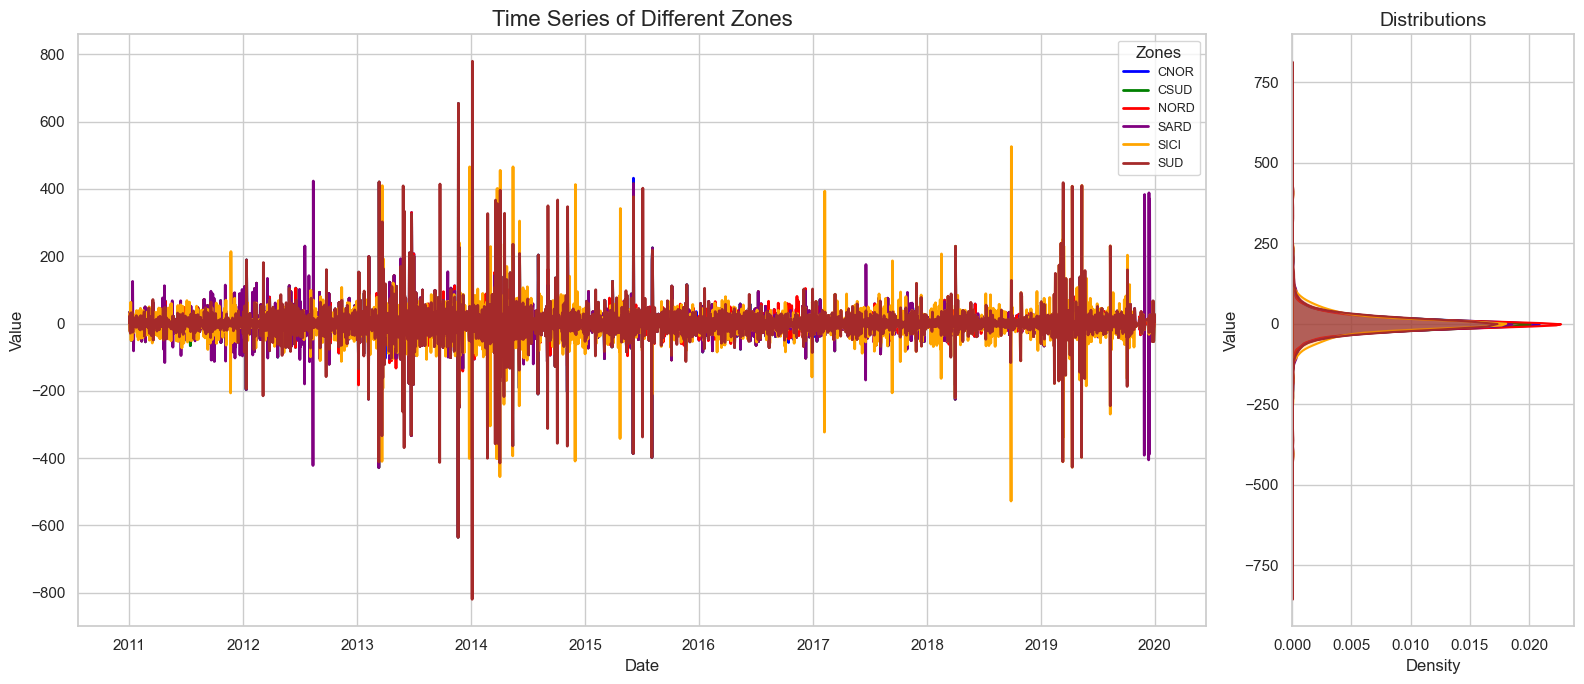

In [342]:


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
from matplotlib.gridspec import GridSpec

# Set style


# Create a figure with two subplots: time series (wide) and KDEs (narrow)
fig = plt.figure(figsize=(16, 7))
gs = GridSpec(1, 2, width_ratios=[4, 1])  # 4:1 ratio

# === Left plot: Time series ===
ax0 = fig.add_subplot(gs[0])

# Plot each time series
ax0.plot(df_sorted_hour["date"], df_sorted_hour["R_CNOR"], color='blue', linewidth=2, label='CNOR')
ax0.plot(df_sorted_hour["date"], df_sorted_hour["R_CSUD"], color='green', linewidth=2, label='CSUD')
ax0.plot(df_sorted_hour["date"], df_sorted_hour["R_NORD"], color='red', linewidth=2, label='NORD')
ax0.plot(df_sorted_hour["date"], df_sorted_hour["R_SARD"], color='purple', linewidth=2, label='SARD')
ax0.plot(df_sorted_hour["date"], df_sorted_hour["R_SICI"], color='orange', linewidth=2, label='SICI')
ax0.plot(df_sorted_hour["date"], df_sorted_hour["R_SUD"], color='brown', linewidth=2, label='SUD')

# Format x-axis to show only years
ax0.xaxis.set_major_locator(mdates.YearLocator())
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels
ax0.set_title("Time Series of Different Zones", fontsize=16)
ax0.set_xlabel("Date", fontsize=12)
ax0.set_ylabel("Value", fontsize=12)
ax0.legend(title="Zones", fontsize=9)

# === Right plot: KDEs ===
ax1 = fig.add_subplot(gs[1])

# Plot KDEs vertically
sns.kdeplot(y=df_sorted_hour["R_CNOR"].dropna(), ax=ax1, color='blue', label='CNOR', fill=True, linewidth=1.5)
sns.kdeplot(y=df_sorted_hour["R_CSUD"].dropna(), ax=ax1, color='green', label='CSUD', fill=True, linewidth=1.5)
sns.kdeplot(y=df_sorted_hour["R_NORD"].dropna(), ax=ax1, color='red', label='NORD', fill=True, linewidth=1.5)
sns.kdeplot(y=df_sorted_hour["R_SARD"].dropna(), ax=ax1, color='purple', label='SARD', fill=True, linewidth=1.5)
sns.kdeplot(y=df_sorted_hour["R_SICI"].dropna(), ax=ax1, color='orange', label='SICI', fill=True, linewidth=1.5)
sns.kdeplot(y=df_sorted_hour["R_SUD"].dropna(), ax=ax1, color='brown', label='SUD', fill=True, linewidth=1.5)

ax1.set_xlabel("Density")
ax1.set_ylabel("Value")
ax1.set_title("Distributions", fontsize=14)
#ax1.get_legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()


In [343]:
import numpy as np

def gcvar(losses,alpha=0.95, g=lambda u: u):
    """
    Compute the Generalized Conditional Value at Risk (GCVaR).
    
    Parameters:
        losses (array-like): Vector of losses (higher = worse).
        alpha (float): Confidence level (e.g., 0.95).
        g (function): Distortion function g(u), where u in [0, 1].
        
    Returns:
        GCVaR (float): Generalized Conditional Value at Risk
    """
    losses = np.sort(losses)
    n = len(losses)
    u_vals = np.arange(1, n + 1) / n  # Empirical probabilities
    
    # Compute VaR at different u levels
    VaR_u = np.quantile(losses, u_vals, method='linear')  # type 7 equivalent
    # Distortion function for standard CVaR
    # Numerical derivative of g(u)
    g_vals = g(u_vals)
    g_derivative = np.diff(g_vals) / np.diff(u_vals)
    g_midpoints = (g_derivative[1:] + g_derivative[:-1]) / 2

    # Approximate the integral using trapezoidal rule over (alpha, 1]
    valid_idx = u_vals[1:] > alpha
    integral_approx = np.sum(g_midpoints[valid_idx[1:]] * VaR_u[1:][valid_idx] * np.diff(u_vals)[valid_idx])

    GCVaR = integral_approx / (1 - alpha)
    return GCVaR


In [344]:
np.random.seed(123)
losses = df_sorted_hour["R_CNOR"]  # Example losses (absolute values of returns)
# Calcolo GCVaR
result = gcvar(losses,alpha = 0.975)
print("GCVaR (standard CVaR case):", result)

GCVaR (standard CVaR case): 116.73947691980247


In [345]:
# Extreme Downside Correlation (EDC)
def EDC_range(start_year, end_year, df, R1, R2,alpha=0.975, 
              start_month=1, start_day=1, 
              end_month=12, end_day=31):
    """
    Calculates the Extreme Downside Correlation (EDC) between two time series
    for a specified date range (by year, month, or day).

    Parameters:
    ---------------
    start_year (int): The starting year for the calculation.
    end_year (int): The ending year for the calculation (inclusive).
    df (DataFrame): The dataframe containing the time series data.
    R1 (str): The column name for the first time series.
    R2 (str): The column name for the second time series.
    start_month (int, optional): The starting month (default is 1 for January).
    start_day (int, optional): The starting day (default is 1).
    end_month (int, optional): The ending month (default is 12 for December).
    end_day (int, optional): The ending day (default is 31).
    Returns:
    --------
    float: The Extreme Downside Correlation value between R1 and R2 over the 
           specified time period. Returns np.nan if the denominator is zero.
    """
    
    df = df.copy()
    df = df.dropna()
    df["date"] = pd.to_datetime(df["date"])

    # Costruisci le date precise
    start_date = pd.Timestamp(start_year, start_month, start_day)
    end_date = pd.Timestamp(end_year, end_month, end_day)

    # Filtra per l'intervallo temporale
    df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

    # Estrai le serie
    R1_vals = df[R1].values
    R2_vals = df[R2].values

    
    # Calcola media, numeratore, denominatore
    R1_mean = np.mean(R1_vals)
    R2_mean = np.mean(R2_vals)
    
    # fixed cvar for the considered time period
    Cvar_R1_filtr = gcvar(R1_vals,alpha = alpha)
    Cvar_R2_filtr = gcvar(R2_vals,alpha = alpha)
    
    #list comperension to calculate cvar for each zone in the time 
    R1_Cvals = [gcvar(R1_vals[1:n]) for n in range(1, len(R1_vals))]
    R2_Cvals = [gcvar(R2_vals[1:n]) for n in range(1, len(R2_vals))]
    
    bol_R1 = np.where(R1_Cvals > Cvar_R1_filtr, 1, 0)
    bol_R2 = np.where(R2_Cvals > Cvar_R2_filtr, 1, 0)
    
    numerator = np.sum((R1_vals - R1_mean) * bol_R1 * (R2_vals - R2_mean) * bol_R2)
    denominator = np.sqrt(np.sum((R1_vals - R1_mean) * bol_R1**2)) * np.sqrt(np.sum((R2_vals - R2_mean) * bol_R2**2))
 
    return numerator/ denominator if denominator != 0 else np.nan 

In [347]:
EDC_range(2015, 2020, df_sorted_hour, "R_CNOR", "R_CSUD")

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
zone_list = ["R_CNOR", "R_CSUD", "R_NORD", "R_SARD", "R_SICI", "R_SUD"]
EDC_matrix = pd.DataFrame(index=zone_list, columns=zone_list)
ds = 2011
de = 2020
for i in range(len(zone_list)):
    for j in range(len(zone_list)):
        if i != j:
            EDC_matrix.iloc[i, j] = EDC_range(ds,de, df_sorted_hour, zone_list[i], zone_list[j])
        else:
            EDC_matrix.iloc[i, j] = 1.0

IndexError: index -1 is out of bounds for axis 0 with size 0